In [1]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
gpu = gpus[0]

tf.config.experimental.set_memory_growth(gpu,True)

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

In [3]:
import keras
from keras.utils import plot_model

In [24]:
max_feature = 10000
maxlen = 500

In [18]:
(x_train_main, y_train),(x_test_main, y_test)= imdb.load_data(num_words=max_feature)

x_train = sequence.pad_sequences(x_train_main, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test_main, maxlen=maxlen)

print("Generating Reverse Data")
x_train_r = [x[::-1] for x in x_train_main]
x_test_r = [x[::-1] for x in x_test_main]

x_train_r = sequence.pad_sequences(x_train_r, maxlen=maxlen)
x_test_r = sequence.pad_sequences(x_test_r, maxlen=maxlen)
print('Done')

Generating Reverse Data
Done


In [19]:
x_train.shape, x_train_r.shape

((25000, 500), (25000, 500))

In [10]:
run = 0

In [15]:
varient = 'base'
log_dir = f'logdir/{varient}+{run}'
model_path = 'imdb_'+varient+'.h5'
run+=1

tb = keras.callbacks.TensorBoard(log_dir=log_dir,
                                 histogram_freq=1,
                                 embeddings_freq=1)

es = keras.callbacks.EarlyStopping(monitor='acc',
                                   patience=5,
                                   verbose=1)

ckpt = keras.callbacks.ModelCheckpoint(filepath=model_path,
                                       monitor='val_loss',
                                       save_best_only=True)

callback_list = [tb, es, ckpt]

In [16]:
# Non Reversed Model - BASELINE
model = Sequential()
model.add(layers.Embedding(max_feature, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128,validation_split=0.2, callbacks=callback_list)

Epoch 1/10
157/157 [==============================] - 8s 43ms/step - loss: 0.5487 - acc: 0.7153 - val_loss: 0.3634 - val_acc: 0.8482
Epoch 2/10
157/157 [==============================] - 7s 42ms/step - loss: 0.2902 - acc: 0.8890 - val_loss: 0.3534 - val_acc: 0.8520
Epoch 3/10
157/157 [==============================] - 6s 41ms/step - loss: 0.2232 - acc: 0.9168 - val_loss: 0.3052 - val_acc: 0.8810
Epoch 4/10
157/157 [==============================] - 6s 40ms/step - loss: 0.1873 - acc: 0.9326 - val_loss: 0.2911 - val_acc: 0.8892
Epoch 5/10
157/157 [==============================] - 6s 41ms/step - loss: 0.1531 - acc: 0.9454 - val_loss: 0.8567 - val_acc: 0.7440
Epoch 6/10
157/157 [==============================] - 6s 40ms/step - loss: 0.1524 - acc: 0.9479 - val_loss: 0.3157 - val_acc: 0.8806
Epoch 7/10
157/157 [==============================] - 6s 41ms/step - loss: 0.1109 - acc: 0.9598 - val_loss: 0.3825 - val_acc: 0.8662
Epoch 8/10
157/157 [==============================] - 7s 42ms/step - 

In [17]:
model.evaluate(x_train,y_train)

782/782 [==============================] - 6s 8ms/step - loss: 0.1170 - acc: 0.9647


[0.11696185916662216, 0.9647200107574463]

In [18]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.4115 - acc: 0.8649


[0.4115009009838104, 0.8649200201034546]

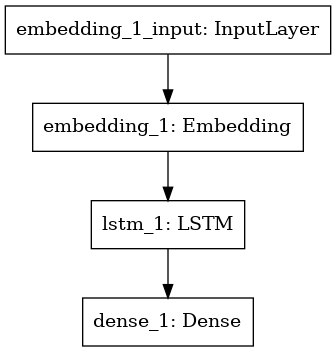

In [20]:
plot_model(model,f'imdb_{varient}_.png')

In [20]:
run = 0

In [21]:
varient = 'reversed'
log_dir = f'logdir/{varient}+{run}'
model_path = 'imdb_'+varient+'.h5'
run+=1

tb = keras.callbacks.TensorBoard(log_dir=log_dir,
                                 histogram_freq=1,
                                 embeddings_freq=1)

es = keras.callbacks.EarlyStopping(monitor='acc',
                                   patience=5,
                                   verbose=1)

ckpt = keras.callbacks.ModelCheckpoint(filepath=model_path,
                                       monitor='val_loss',
                                       save_best_only=True)
callback_list = [tb, es, ckpt]

# Reversed Model - BASELINE
model = Sequential()
model.add(layers.Embedding(max_feature, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train_r, y_train, epochs=10, batch_size=128,validation_split=0.2, callbacks=callback_list)

Epoch 1/10
157/157 [==============================] - 8s 46ms/step - loss: 0.5858 - acc: 0.6727 - val_loss: 0.4292 - val_acc: 0.8244
Epoch 2/10
157/157 [==============================] - 6s 40ms/step - loss: 0.3193 - acc: 0.8780 - val_loss: 0.3423 - val_acc: 0.8750
Epoch 3/10
157/157 [==============================] - 7s 46ms/step - loss: 0.2452 - acc: 0.9126 - val_loss: 0.3453 - val_acc: 0.8728
Epoch 4/10
157/157 [==============================] - 6s 41ms/step - loss: 0.2040 - acc: 0.9290 - val_loss: 0.3439 - val_acc: 0.8812
Epoch 5/10
157/157 [==============================] - 6s 41ms/step - loss: 0.1895 - acc: 0.9313 - val_loss: 0.3336 - val_acc: 0.8808
Epoch 6/10
157/157 [==============================] - 6s 41ms/step - loss: 0.1621 - acc: 0.9426 - val_loss: 0.4538 - val_acc: 0.8170
Epoch 7/10
157/157 [==============================] - 7s 43ms/step - loss: 0.1555 - acc: 0.9465 - val_loss: 0.6072 - val_acc: 0.8546
Epoch 8/10
157/157 [==============================] - 7s 47ms/step - 

782/782 [==============================] - 6s 8ms/step - loss: 0.1335 - acc: 0.9593
[0.13349691033363342, 0.9592800140380859]
782/782 [==============================] - 7s 9ms/step - loss: 0.4695 - acc: 0.8464
[0.4695044159889221, 0.8464400172233582]


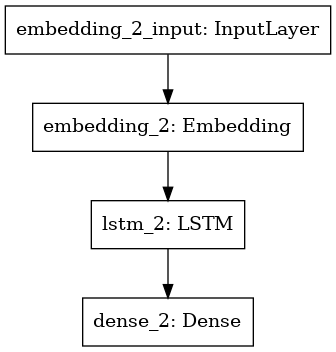

In [22]:
print(model.evaluate(x_train_r,y_train))
print(model.evaluate(x_test_r,y_test))
plot_model(model,f'imdb_{varient}_.png')

In [ ]:
run = 0

In [27]:
varient = 'bidirectional'
log_dir = f'logdir/{varient}+{run}'
model_path = 'imdb_'+varient+'.h5'
run+=1

tb = keras.callbacks.TensorBoard(log_dir=log_dir,
                                 histogram_freq=1,
                                 embeddings_freq=1)

es = keras.callbacks.EarlyStopping(monitor='acc',
                                   patience=5,
                                   verbose=1)

ckpt = keras.callbacks.ModelCheckpoint(filepath=model_path,
                                       monitor='val_loss',
                                       save_best_only=True)
callback_list = [tb, es, ckpt]

# BiDirectional LSTM
model = Sequential()
model.add(layers.Embedding(max_feature,32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callback_list)

Epoch 1/10
157/157 [==============================] - 11s 55ms/step - loss: 0.6362 - acc: 0.6394 - val_loss: 0.4650 - val_acc: 0.8296
Epoch 2/10
157/157 [==============================] - 7s 42ms/step - loss: 0.3517 - acc: 0.8606 - val_loss: 0.3322 - val_acc: 0.8690
Epoch 3/10
157/157 [==============================] - 7s 42ms/step - loss: 0.2536 - acc: 0.9048 - val_loss: 0.3844 - val_acc: 0.8194
Epoch 4/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2149 - acc: 0.9210 - val_loss: 0.3722 - val_acc: 0.8758
Epoch 5/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1828 - acc: 0.9347 - val_loss: 0.3118 - val_acc: 0.8870
Epoch 6/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1546 - acc: 0.9434 - val_loss: 0.2949 - val_acc: 0.8844
Epoch 7/10
157/157 [==============================] - 7s 42ms/step - loss: 0.1337 - acc: 0.9539 - val_loss: 0.3661 - val_acc: 0.8512
Epoch 8/10
157/157 [==============================] - 7s 47ms/step -

782/782 [==============================] - 9s 11ms/step - loss: 0.1312 - acc: 0.9579
[0.1311572641134262, 0.9578800201416016]
782/782 [==============================] - 9s 11ms/step - loss: 0.3857 - acc: 0.8662
[0.38572120666503906, 0.8662400245666504]


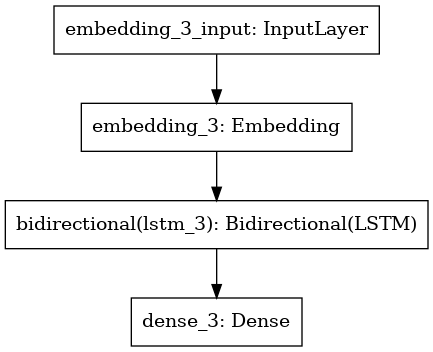

In [28]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))
plot_model(model,f'imdb_{varient}_.png')

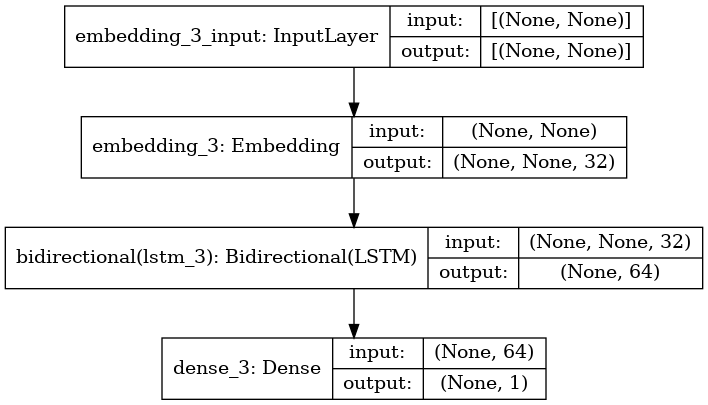

In [29]:
plot_model(model,f'imdb_{varient}_.png', show_shapes=True)